# 1. Introduction

Yesterday, we learned about the theory of some of the concepts in linear algebra. Today, we will apply our knowledge using Python and specifically Numpy.

There is no separate lecture today, this notebook functions both as a lecture and a problem set.

**Feel free to ask me (Richard) whenever you have questions or you want hints to the problems.**

**Tasks marked with an asterisk (*) are optional, only do them if you have time or special interest.**

## Why Numpy?

Numpy is a Python library used to operate with vectors, matrices, and general n-dimensional arrays. It has many built-in functions (see https://numpy.org/doc/stable/reference/#), is user-friendly, and conveniently supports built-in Python operators (e.g. `+`, `-`, `*`, `/`) and other element-wise functions (e.g. `np.exp()`, `np.sqrt()`).

One of the main advantages of Numpy is its computational efficiency. Under the hood, it uses C and C++ operations, which can be a magnitude faster than the same operations in Python. This is especially important when operating with a lot of data and large matrices. Therefore, the following advice holds:

**Try to avoid Python `for` loops whenever possible for iterating over large arrays. Instead, try to take advantage of Numpy built-in functions, broadcasting, and indexing.**

## Why use Python and not e.g. Matlab?

There is no specific reason, you can use either. Numpy and Matlab have a lot in common and share many functions. I personally prefer Python because it is more flexible and it is easier to define and use custom functions. However, Matlab has a somewhat easier user interface.

---
**Task 1.1:**

Make a copy of this Google Colab notebook so you can modify it and execute your own code.

---
**Task 1.2:**

If you are new to Numpy or you want to refresh your memory, read the quickstart tutorial here: https://numpy.org/devdocs/user/quickstart.html. If you are new to Python, I recommend you pair up with someone more experienced.

---
If needed, you can find the Python tutorial here: https://docs.python.org/3/tutorial/.

In [ ]:
### Feel free to play around and test out Numpy here ###

import numpy as np

A = np.array([[1, 2], [3, 4]])
B = A**2 # element-wise squaring, not matrix multiplication!
print(B)
C = B + np.sqrt(A)
D = B @ C # matrix multiplication, equivalent to np.matmul()
print(D)

[[ 1  4]
 [ 9 16]]
[[ 44.92820323  77.41421356]
 [189.71281292 336.72792206]]


# 2. Singular Value Decomposition

## Low-rank Matrix Approximation

This tutorial might help you with the tasks: https://numpy.org/numpy-tutorials/content/tutorial-svd.html. You can also consult https://en.wikipedia.org/wiki/Singular_value_decomposition#Applications_of_the_SVD.

---
**Task 2.1:**

Complete the function below. Test the function on some simple cases (e.g. `r=0`, `r=1`, `r=n`) to make sure it works correctly.

---

In [ ]:
def low_rank_approx(M, r):
    """
    Returns a rank r approximation of matrix M. The returned matrix M' has
    rank(M') = r and minimizes the Frobenius norm (squared sum of matrix entries)
    of matrix M' - M.

    """

    # YOUR CODE HERE

---
**Task 2.2:**

Find the rank-2 approximation of $M = \begin{pmatrix}1&2&3&0\\3&0&4&5\\5&4&3&2\\4&1&0&2\end{pmatrix}$. What are its singular values?

---

In [ ]:
# YOUR CODE HERE

**(Fixed: "squared sums" -> "sum of the squares")**

We can define the *energy* of a matrix $M$ to be the sum of the squares of its singular values. Therefore, if $M$ has singular values $\sigma_1 > \cdots > \sigma_n$ and we take the rank $r$ approximation of $M$ (only keep singular values $\sigma_1, \ldots, \sigma_r$), then the energy percentage of the approximation is defined as

$$\varphi = \frac{\sum_i^r \sigma_i^2}{\sum_i^n \sigma_i^2}.$$

---
**Task 2.3:**

**(Fixed: higher energy percentages)**

Take an image of your own choice and convert it to a numpy array. Find (and plot) the low-rank approximations of the image that retain 90%, 99%, and 99.9% of the energy, respectively (also plot the original image). What are the corresponding values of $r$?

*Note: For a color image with 3 channels, you may define the energy to be the average energy of the channels.*

---

In [ ]:
# YOUR CODE HERE

## Least Squares Minimization

---
**Task 2.4:**

Use SVD to find the cubic best (least squares) fit for the following data $(x_i, y_i)$.

*Hint: Think how you can convert a cubic regression problem to a linear regression problem. Ask the TAs if you get stuck.*

---

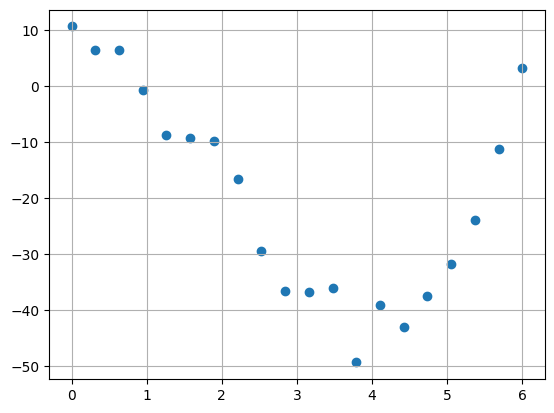

In [ ]:
import matplotlib.pyplot as plt

n = 20
gen = np.random.default_rng(seed=0) # deterministic random generator

x = np.linspace(0, 6, n)
y = x**3 - 5*x**2 - 8*x + 10 + gen.normal(0, 5, n)

plt.scatter(x, y)
plt.grid(True)
plt.show()

# YOUR CODE HERE

## Rank, range, null space

---
**Task 2.5:**

Write functions to directly find the rank, an orthonormal basis of the column space, and an orthonormal basis of the null space of a matrix using SVD.

Test your functions on $A=\begin{pmatrix}1&0&2&0\\0&2&0&5\\3&0&6&0\\0&4&0&10\end{pmatrix}$. Check if the results make sense.

---

In [ ]:
def rank(M):
    """
    Returns the rank of matrix M.
    """
    # YOUR CODE HERE

def colspace_basis(M):
    """
    Returns an orthonormal basis of colsp(M).
    """
    # YOUR CODE HERE

def null_basis(M):
    """
    Returns an orthonormal basis of null(M).
    """
    # YOUR CODE HERE

# 3. Principal Component Analysis

PCA can be used to reduce the dimensionality of a high-dimensional data, without losing much in information. This can be used to, for example, visualize high-dimensional data. PCA can also be used to speed up machine learning algorithms.

From https://www.geeksforgeeks.org/principal-component-analysis-with-python/:

Objectives of PCA:

1. It is basically a non-dependent procedure in which it reduces attribute space from a large number of variables to a smaller number of factors.
2. PCA is basically a dimension reduction process but there is no guarantee that the dimension is interpretable.
3. The main task in this PCA is to select a subset of variables from a larger set, based on which original variables have the highest correlation with the principal amount.
4. Identifying patterns: PCA can help identify patterns or relationships between variables that may not be apparent in the original data. By reducing the dimensionality of the data, PCA can reveal underlying structures that can be useful in understanding and interpreting the data.
5. Feature extraction: PCA can be used to extract features from a set of variables that are more informative or relevant than the original variables. These features can then be used in modeling or other analysis tasks.
6. Data compression: PCA can be used to compress large datasets by reducing the number of variables needed to represent the data, while retaining as much information as possible.
7. Noise reduction: PCA can be used to reduce the noise in a dataset by identifying and removing the principal components that correspond to the noisy parts of the data.
8. Visualization: PCA can be used to visualize high-dimensional data in a lower-dimensional space, making it easier to interpret and understand. By projecting the data onto the principal components, patterns and relationships between variables can be more easily visualized.

---
**Task 3.1:**

Inspect the iris data below. How many features are there? How many different target values are there (and what are they)? If you are new to Pandas, you can use this guide as a reference: https://pandas.pydata.org/docs/user_guide/index.html.

---

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(df)

# YOUR CODE HERE

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


---
**Task 3.2:**

Make a 2D scatter plot of the data, with one of the four features on each axis (you can arbitrarily choose the two features to plot). Use a different color for each target value. Are data points with different target values well separated in the plot?

---

In [ ]:
# YOUR CODE HERE

---
**Task 3.3:**

Perform PCA on the features (not target) of the data set above. As PCA is sensitive to the scale of coordinates, make sure to standardize the features first (mean = 0 and variance = 1). Again, make a 2D scatter plot, but now use the first two PCA axes for plotting. Is the separation better, worse, or similar than in the previous plot?

If you need help, you can refer to this tutorial: https://builtin.com/machine-learning/pca-in-python.

---

In [ ]:
# YOUR CODE HERE

---
**Task 3.4:**

What percentage of the total variance is contained in each PCA axis? Inspect the first PCA axis. Which feature contributes to the first PCA axis the most?

---

In [ ]:
# YOUR CODE HERE

---
*** Task 3.5:**

Divide the data into training data (80%) and test data (20%). Use the training data to fit the standardization and PCA transforms. Then, use the first two PCA components and logistic regression to predict the target class. Plot the data points with predictions for both training and test data, similar as in this tutorial: https://www.geeksforgeeks.org/principal-component-analysis-with-python/. If you get stuck, feel free to use the tutorial as a reference.

![Scatter plot of training data and logistic regression predictions](https://media.geeksforgeeks.org/wp-content/uploads/trainset.png)

---

# 4. Robust PCA

Robust PCA (RPCA) is a generalization of PCA, which can additionally detect outliers (a sparse component) in the data. RPCA divides a matrix $M$ into two components: a low-rank component $L$ and a sparse component $S$. Candès et al. have proved that under weak assumptions about $M$, there is an efficient algorithm, known as Principal Component Pursuit (PCP), which can decompose $M$ into $L$ and $S$, minimizing

$$||L||_* + \lambda ||S||_1.$$

One application of RPCA is video surveillance, where frames can be divided into two matrices, where $L$ corresponds to the low-rank background, and $S$ corresponds to the objects in the foreground.

![Example of RPCA in video surveillance](https://miro.medium.com/v2/resize:fit:1400/1*U2fqCwhpmC3gK_T72ZtP-A.png)

(First row: M, second row: L, third row: S)

---
**Task 4.1:**

Read through https://freshprinceofstandarderror.com/ai/robust-principal-component-analysis/.

---
*** Task 4.2:**

Follow and replicate the tutorial here: http://jeankossaifi.com/blog/rpca.html. See if you can separate the video surveillance video into two videos: background and foreground.

---
If you're interested to read more about RPCA:

* Original paper: https://class.ece.uw.edu/546/2010spr/papers/RobustPCA.pdf
* Comparison of RPCA algorithms and discussion of challenges in video surveillance: https://www.researchgate.net/publication/258885717_Robust_PCA_via_Principal_Component_Pursuit_A_Review_for_a_Comparative_Evaluation_in_Video_Surveillance
* More theoretical discussion of RPCA (slide show): https://www.ece.iastate.edu/~namrata/GIAN_course_Vaswani.pdf




In [ ]:
# YOUR CODE HERE

# 5. Autoencoders

Autoencoders are another way of performing dimensionality reduction. As opposed to PCA, which can only do linear dimensionality reduction, autoencoders can perform nonlinear dimensionality reduction.

![Schema of an autoencoder](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

---
**Task 5.1:**

Read through the discussion of autoencoders here: https://www.jeremyjordan.me/autoencoders/ and here https://www.v7labs.com/blog/autoencoders-guide. Compare PCA and autoencoders and think of the pros/cons of each method. When would you use PCA and when would you use autoencoders?

---


Autoencoders are often used as intermediate steps in other machine learning approaches, e.g. classification. Another benefit is that the "bottleneck" nodes (called *latent variables*) allow us to gain more insight about the black box of neural networks.

---
**Task 5.2:**

Skim through this paper: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8737996. The authors of this paper use an autoencoder to perform both classification and regression. According to the authors, how many latent variables is sufficient to perform the tasks successfully? Look through Figures 4-8, especially Figure 7. What insight can we gain from investigating the values of latent variables (called Z layer neurons in the paper)?

---
**Task 5.3:**

Train both a basic and convolutional autoencoder on the MNIST data (contains hand-written images of digits 0-9). Use this tutorial as a reference: https://www.tensorflow.org/tutorials/generative/autoencoder. Play around with the number of latent variables.

---

In [ ]:
import tensorflow as tf

(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


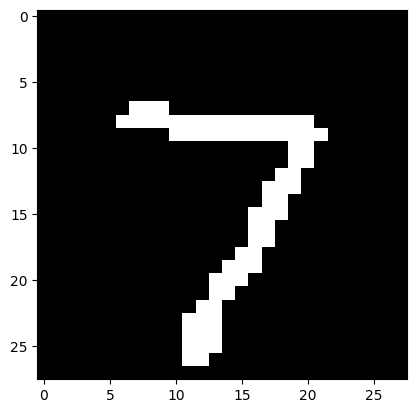

In [ ]:
print(train_images.shape)
print(test_images.shape)
plt.imshow(test_images[0], cmap='gray')
plt.show()

# YOUR CODE HERE

---
*** Task 5.4:**

Use the latent variables as an input to a classification algorithm (that classifies which digit is present in the image). You can either use a traditional method (e.g. logistic regression) or another neural network. What is your test error?

---

In [ ]:
# YOUR CODE HERE

---
*** Task 5.5:**

Follow and replicate the variational autoencoder tutorial here: https://www.tensorflow.org/tutorials/generative/cvae.

---

In [ ]:
# YOUR CODE HERE

Feel free to read more about variational autoencoders: https://arxiv.org/pdf/1906.02691.pdf.